In [55]:
import xarray as xr
import numpy as np
import pycno
import matplotlib.pyplot as plt

In [59]:
jdir = '/n/holyscratch01/jacob_lab/jeast/proj/globalinv/imi_testing/jacobian_runs/imi_testing_{:06d}'
hcodiagf = 'OutputDir/HEMCO_diagnostics.201901010000.nc'

In [60]:
def open_hco(case):
    fpath = f'{jdir.format(case)}/{hcodiagf}'
    print(fpath)
    with xr.open_dataset(fpath) as ds:
        emis_total = ds['EmisCH4_Total']
    return emis_total.squeeze()

In [61]:
emis_cases = dict()
for i in range(4):
    emis_cases[i] = open_hco(i)

/n/holyscratch01/jacob_lab/jeast/proj/globalinv/imi_testing/jacobian_runs/imi_testing_000000/OutputDir/HEMCO_diagnostics.201901010000.nc
/n/holyscratch01/jacob_lab/jeast/proj/globalinv/imi_testing/jacobian_runs/imi_testing_000001/OutputDir/HEMCO_diagnostics.201901010000.nc
/n/holyscratch01/jacob_lab/jeast/proj/globalinv/imi_testing/jacobian_runs/imi_testing_000002/OutputDir/HEMCO_diagnostics.201901010000.nc
/n/holyscratch01/jacob_lab/jeast/proj/globalinv/imi_testing/jacobian_runs/imi_testing_000003/OutputDir/HEMCO_diagnostics.201901010000.nc


In [62]:
base = emis_cases[0].copy(deep=True)

In [63]:
cno = pycno.cno()

/n/holyscratch01/jacob_lab/jeast/proj/globalinv/imi_testing/jacobian_runs/imi_testing_000000/OutputDir/HEMCO_diagnostics.201901010000.nc
/n/holyscratch01/jacob_lab/jeast/proj/globalinv/imi_testing/jacobian_runs/imi_testing_000001/OutputDir/HEMCO_diagnostics.201901010000.nc


/tmp/ipykernel_1438703/2972858341.py:6: RuntimeWarning: invalid value encountered in divide
  myds.lon, myds.lat, myds.values/base.values,
/tmp/ipykernel_1438703/2972858341.py:6: RuntimeWarning: invalid value encountered in divide
  myds.lon, myds.lat, myds.values/base.values,


/n/holyscratch01/jacob_lab/jeast/proj/globalinv/imi_testing/jacobian_runs/imi_testing_000002/OutputDir/HEMCO_diagnostics.201901010000.nc
/n/holyscratch01/jacob_lab/jeast/proj/globalinv/imi_testing/jacobian_runs/imi_testing_000003/OutputDir/HEMCO_diagnostics.201901010000.nc


/tmp/ipykernel_1438703/2972858341.py:6: RuntimeWarning: invalid value encountered in divide
  myds.lon, myds.lat, myds.values/base.values,
/tmp/ipykernel_1438703/2972858341.py:6: RuntimeWarning: invalid value encountered in divide
  myds.lon, myds.lat, myds.values/base.values,


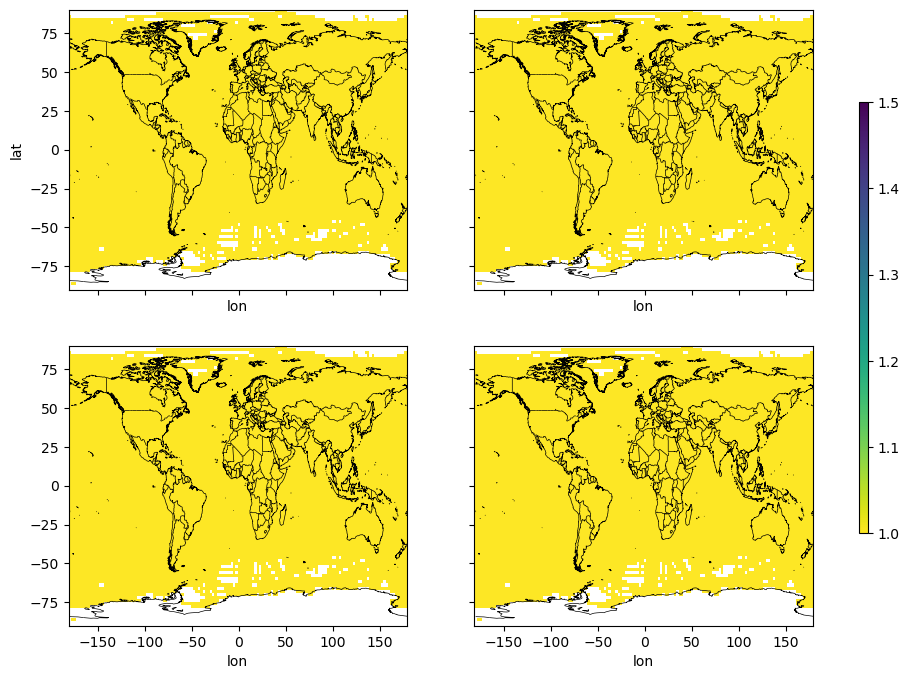

In [64]:
fig,axs = plt.subplots(2,2,figsize=(12,8),sharex=True,sharey=True)
for i in range(4):
    #myds = emis_cases[i]
    myds = open_hco(i)
    pc = axs.ravel()[i].pcolormesh(
        myds.lon, myds.lat, myds.values/base.values,
        vmin=1, vmax=1.5,
        cmap='viridis_r'
    )
    cno.draw(ax=axs.ravel()[i])
    axs.ravel()[i].set_xlabel('lon')
axs.ravel()[0].set_ylabel('lat')
fig.colorbar(pc, orientation='vertical', ax=axs, aspect=50, shrink=0.7)

In [65]:
for i in range(4):
    print((emis_cases[0].values == emis_cases[i].values).all())

True
True
True
True


In [66]:
ds1 = xr.open_dataset(f'{jdir.format(0)}/{hcodiagf}')
ds2 = xr.open_dataset(f'{jdir.format(2)}/{hcodiagf}')

In [67]:
diff = ds1 - ds2

In [68]:
(diff['EmisCH4_Total'] > 0).any()

<xarray.DataArray 'EmisCH4_Total' ()>
array(False)

In [69]:
from glob import glob

In [78]:
sat0 = xr.open_mfdataset(
    sorted(glob(
        '/n/holyscratch01/jacob_lab/jeast/proj/globalinv/imi_testing/jacobian_runs/imi_testing_000000/OutputDir/output_2019013?*nc'
    )), combine='nested', concat_dim='nobs'
)

sat1 = xr.open_mfdataset(
    sorted(glob(
        '/n/holyscratch01/jacob_lab/jeast/proj/globalinv/imi_testing/jacobian_runs/imi_testing_000001/OutputDir/output_2019013?*nc'
    )), combine='nested', concat_dim='nobs'
)

sat2 = xr.open_mfdataset(
    sorted(glob(
        '/n/holyscratch01/jacob_lab/jeast/proj/globalinv/imi_testing/jacobian_runs/imi_testing_000002/OutputDir/output_2019013?*nc'
    )), combine='nested', concat_dim='nobs'
)

sat3 = xr.open_mfdataset(
    sorted(glob(
        '/n/holyscratch01/jacob_lab/jeast/proj/globalinv/imi_testing/jacobian_runs/imi_testing_000003/OutputDir/output_2019013?*nc'
    )), combine='nested', concat_dim='nobs'
)

In [79]:
sat0['gc_xch4'].mean().values

array(1.8415619e-06, dtype=float32)

In [80]:
sat1['gc_xch4'].mean().values

array(1.8415648e-06, dtype=float32)

In [81]:
sat2['gc_xch4'].mean().values

array(1.8415737e-06, dtype=float32)

In [82]:
sat3['gc_xch4'].mean().values

array(1.8415662e-06, dtype=float32)

In [83]:
np.diff([sat0['gc_xch4'].mean().values, sat1['gc_xch4'].mean().values])

array([2.842171e-12], dtype=float32)

In [84]:
np.diff([sat0['gc_xch4'].mean().values, sat2['gc_xch4'].mean().values])

array([1.1823431e-11], dtype=float32)

In [85]:
np.diff([sat0['gc_xch4'].mean().values, sat3['gc_xch4'].mean().values])

array([4.3201e-12], dtype=float32)

In [45]:
sv = xr.open_dataset('StateVector_testing.nc')

In [49]:
np.where(sv['StateVector'] == 3)

(array([61]), array([32]))

In [51]:
sv['StateVector'][61,32]

<xarray.DataArray 'StateVector' ()>
array(3.)
Coordinates:
    lat      float32 32.0
    lon      float32 -100.0
Attributes:
    units:    none

In [54]:
'{:e}'.format(8.2e-11 * 1.5)

'1.230000e-10'